## Dataset frame distribution

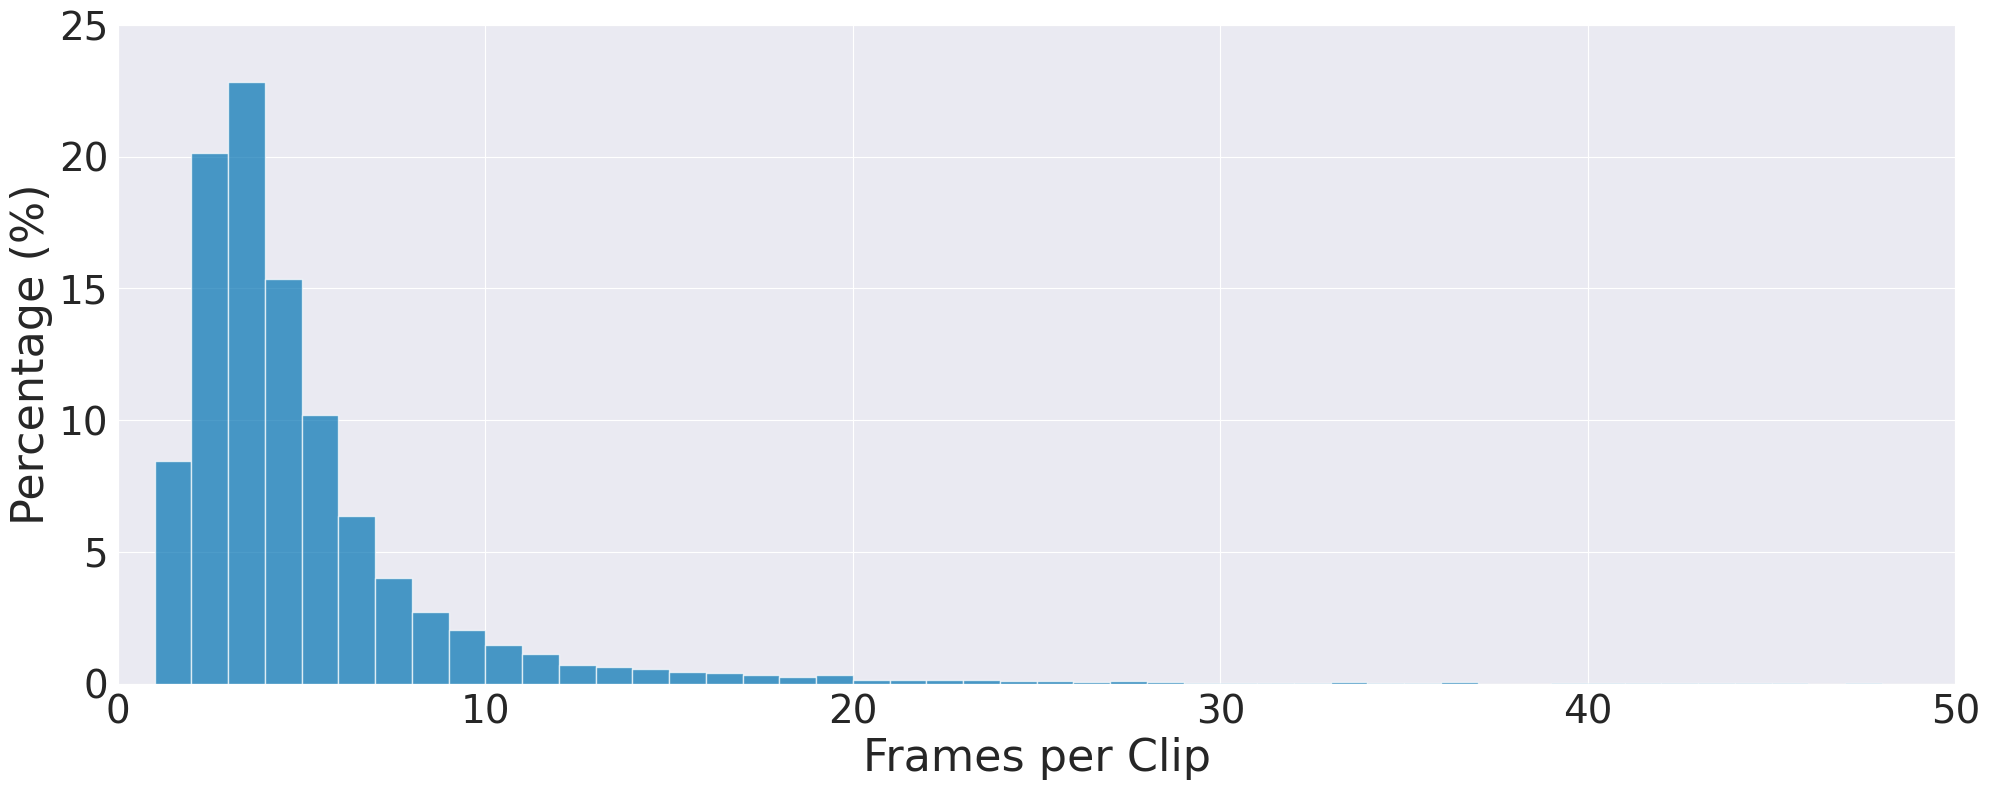

Mean: 4.687374128582494
Median: 3.0
Total frames: 60514
Unique clips: 12910


In [112]:
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")  
colors = sns.color_palette("colorblind")

# Set global font sizes using rcParams
plt.rc("axes", titlesize=14)   # Title font size
plt.rc("axes", labelsize=32)   # X and Y label font size
plt.rc("xtick", labelsize=28)  # X-axis tick label size
plt.rc("ytick", labelsize=28)  # Y-axis tick label size

# Data path
main_path = Path("./data/training/")

# Find all images and clips
all_images = np.array([f for f in main_path.glob("**/*.jpg")])
diff_clips = [f.name.split(".")[0] for f in all_images]

# Count how many times each clip appears
clip_counts = Counter(diff_clips)
clip_values = list(clip_counts.values())  # Extract counts

total_clips = len(clip_values)

# Histogram plot
plt.figure(figsize=(20, 8))
plt.hist(clip_values, bins=range(1, max(clip_values) + 2), 
         weights=np.ones_like(clip_values) * 100 / total_clips,  # Convert to percentage
         color=colors[0], alpha=0.7, edgecolor='white', zorder=3)

plt.ylabel('Percentage (%)')
plt.xlabel('Frames per Clip')
plt.ylim([0, 25])  # Adjust if necessary
plt.xlim([0, 50])
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("images/frame_dist_percentage.pdf", bbox_inches="tight")
plt.show()


# Statistics
print("Mean:", np.mean(clip_values))
print("Median:", np.median(clip_values))

# Sanity check
print("Total frames:", len(all_images))
print("Unique clips:", len(clip_counts))

# Frames per class

In [113]:
# Extract class and clip name (ignoring frame numbers, just clip IDs)
clip_class = np.array([int(f.parent.name) for f in all_images])  # Class of the image
clip_names = [f.stem.split('.')[0] for f in all_images]  # Clip identifier (ignoring frame number)

# Map each unique clip to its class
unique_clip_classes = {}
for i, clip_name in enumerate(clip_names):
    if clip_name not in unique_clip_classes:
        unique_clip_classes[clip_name] = clip_class[i]

# Count how many unique clips belong to each class
unique_clip_class_counts = Counter(unique_clip_classes.values())

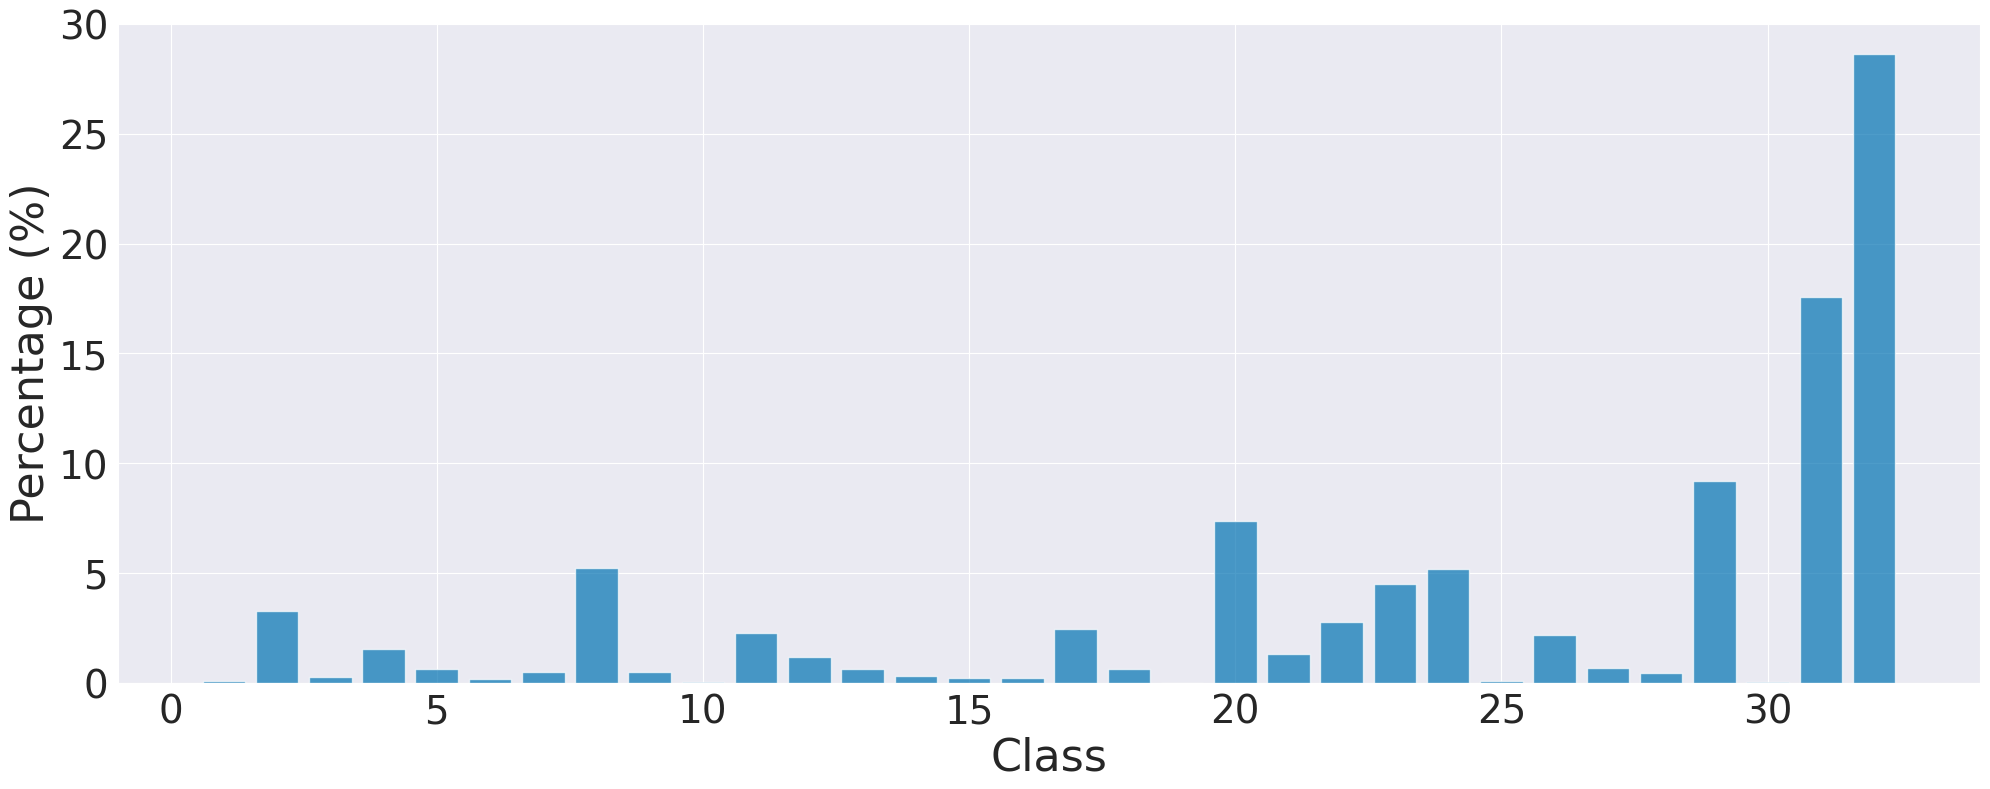

Total number of frames: 60514
Number of classes: 32

Frames per class:
Class 1: 104 frames
Class 2: 1698 frames
Class 3: 183 frames
Class 4: 634 frames
Class 5: 266 frames
Class 6: 191 frames
Class 7: 306 frames
Class 8: 2060 frames
Class 9: 279 frames
Class 10: 12 frames
Class 11: 2345 frames
Class 12: 1403 frames
Class 13: 327 frames
Class 14: 347 frames
Class 15: 97 frames
Class 16: 163 frames
Class 17: 1963 frames
Class 18: 464 frames
Class 19: 14 frames
Class 20: 4994 frames
Class 21: 686 frames
Class 22: 2290 frames
Class 23: 3588 frames
Class 24: 4025 frames
Class 25: 158 frames
Class 26: 3224 frames
Class 27: 622 frames
Class 28: 219 frames
Class 29: 4618 frames
Class 30: 57 frames
Class 31: 6671 frames
Class 32: 16506 frames


In [114]:
# Total number of unique clips
total_clips = np.sum(list(unique_clip_class_counts.values()))

# Clip distribution plot (normalized to percentages)
plt.figure(figsize=(20, 8))
clip_percentages = [(unique_clip_class_counts.get(c, 0) / total_clips) * 100 for c in range(1,33)]  # Convert to percentage

plt.bar(range(1, 33), clip_percentages, zorder=3, color=colors[0], alpha=0.7)
# plt.title("Distribution of Clips by Class")
plt.xlabel("Class")
plt.ylabel("Percentage (%)")
plt.tight_layout()

# Save and show the plot
plt.savefig("images/class_dist_percentage.pdf", bbox_inches="tight")
plt.show()

# Print class statistics
print(f"Total number of frames: {len(clip_class)}")
print(f"Number of classes: {len(np.unique(clip_class))}")
print("\nFrames per class:")
for c in range(1, 33):
    count = np.sum(clip_class == c)
    print(f"Class {c}: {count} frames")